In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 27.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's d

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel, pauli_error
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2025-03-10 23:20:18,621: Default instance: ibm-q/open/main


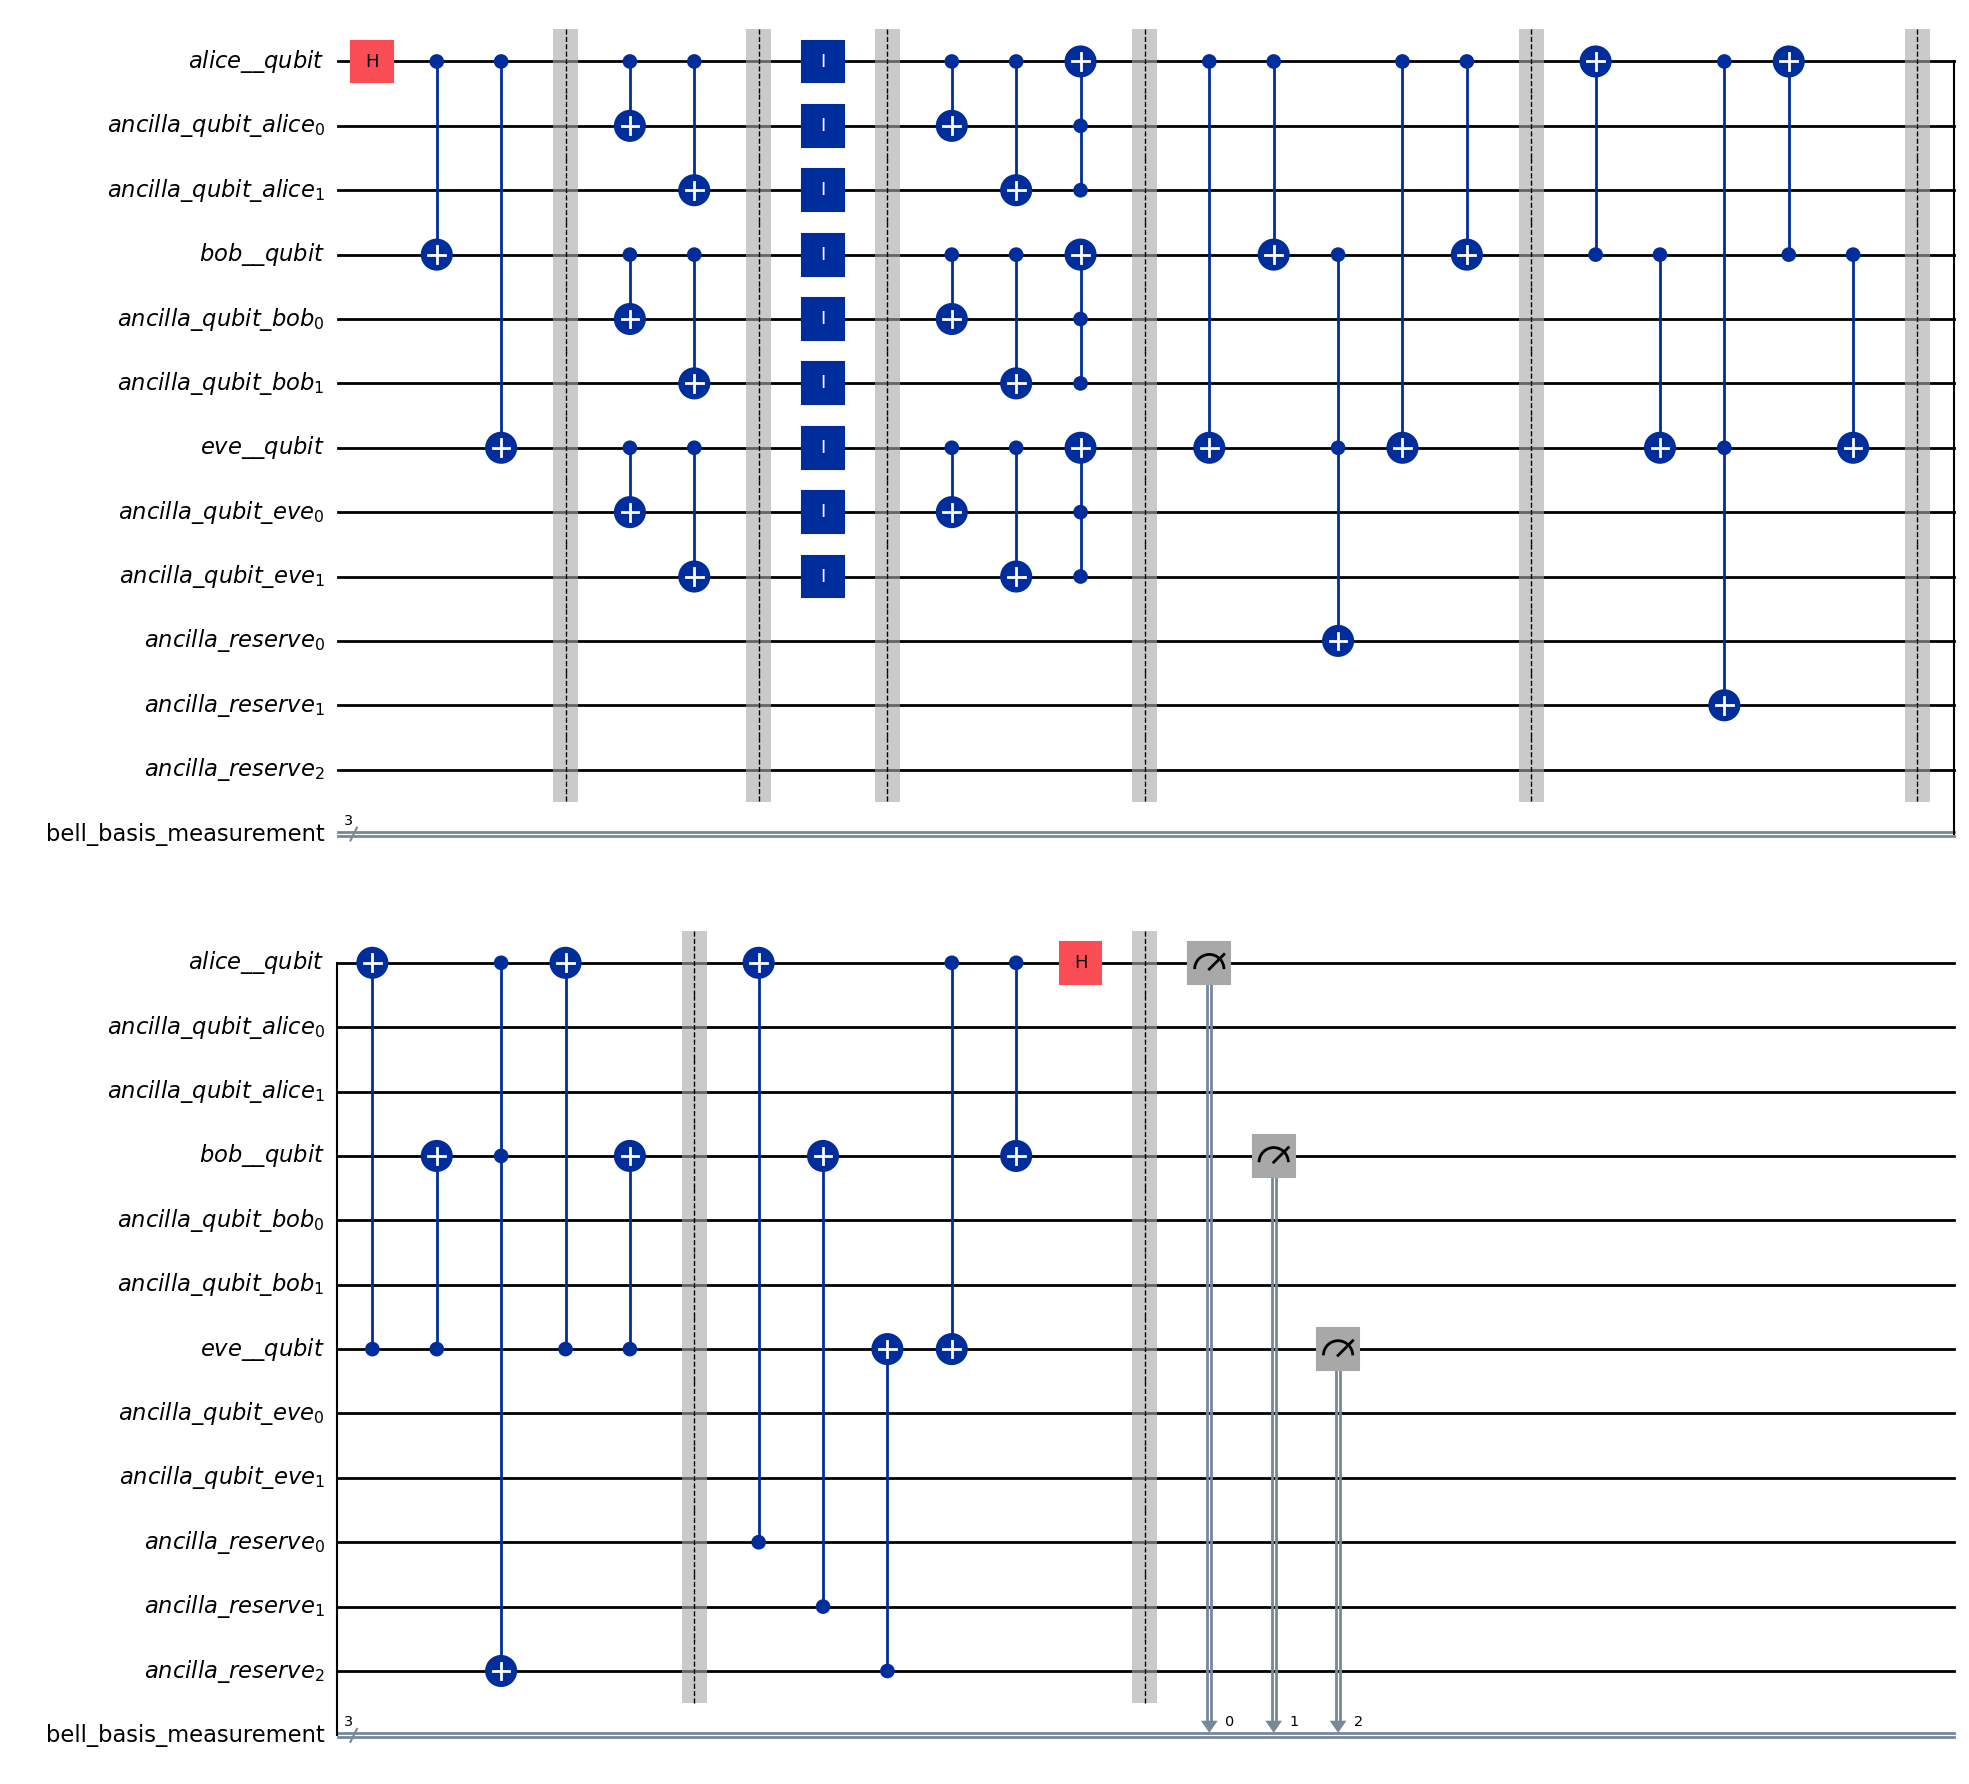

In [7]:
cr= ClassicalRegister(3,"bell_basis_measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(3,'ancilla_reserve')

repetition3 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

repetition3.h(alice)
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)

repetition3.barrier()
repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)

repetition3.barrier()

repetition3.id(range(repetition3.num_qubits-3))
repetition3.barrier()

repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)

repetition3.mcx([1,2],0)
repetition3.mcx([4,5],3)
repetition3.mcx([7,8],6)
repetition3.barrier()

repetition3.cx(alice,eve)
repetition3.cx(alice,bob)
repetition3.ccx(bob, eve, aq4[0])
repetition3.cx(alice,eve)
repetition3.cx(alice,bob)
repetition3.barrier()

repetition3.cx(bob,alice)
repetition3.cx(bob,eve)
repetition3.ccx(alice, eve, aq4[1])
repetition3.cx(bob,alice)
repetition3.cx(bob,eve)
repetition3.barrier()

repetition3.cx(eve,alice)
repetition3.cx(eve,bob)
repetition3.ccx(alice, bob, aq4[2])
repetition3.cx(eve,alice)
repetition3.cx(eve,bob)
repetition3.barrier()


repetition3.cx(aq4[0],alice)
repetition3.cx(aq4[1],bob)
repetition3.cx(aq4[2],eve)
repetition3.cx(alice,eve)
repetition3.cx(alice,bob)
repetition3.h(alice)
repetition3.barrier()

repetition3.measure([alice[0], bob[0], eve[0]],cr)
repetition3.draw(output='mpl')

In [6]:
repetition3.draw(output='mpl').savefig("GHZ state simulation diagram.pdf",dpi=400,bbox_inches="tight")

In [ ]:
cr= ClassicalRegister(3,"bell_basis_measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(2,'ancilla_reserve')

repetition3 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

repetition3.h(alice)
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)

repetition3.barrier()
repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)

repetition3.barrier()

repetition3.id(range(repetition3.num_qubits-2))
repetition3.barrier()

repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)

repetition3.mcx([1,2],0)
repetition3.mcx([4,5],3)
repetition3.mcx([7,8],6)
repetition3.barrier()

# repetition3.cx(bob,alice)
# repetition3.cx(bob,eve)
# repetition3.ccx(alice, eve, aq4[0])
# repetition3.cx(bob,alice)
# repetition3.cx(bob,eve)
# repetition3.barrier()

# repetition3.cx(eve,alice)
# repetition3.cx(eve,bob)
# repetition3.ccx(alice, bob, aq4[1])
# repetition3.cx(eve,alice)
# repetition3.cx(eve,bob)
# repetition3.barrier()

repetition3.cx(alice,eve)
repetition3.cx(alice,bob)
# repetition3.ccx(bob, eve, alice)
# repetition3.cx(aq4[0],bob)
# repetition3.cx(aq4[1],eve)
repetition3.h(alice)
repetition3.barrier()

repetition3.measure([alice[0], bob[0], eve[0]],cr)
repetition3.draw(output='mpl')

In [8]:
# Range of noise levels for one-qubit gates
noise_prob = np.linspace(0,1,30)
# params = 4*noise_prob/3
fidelities3 = []

for rate in noise_prob:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    bit_flip_error = pauli_error([('X',rate), ('I', 1-rate)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip_error, 'id')
    
    simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(repetition3, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['000']
    fidelities3.append(fidelity)

{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}


In [9]:
print(fidelities3)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


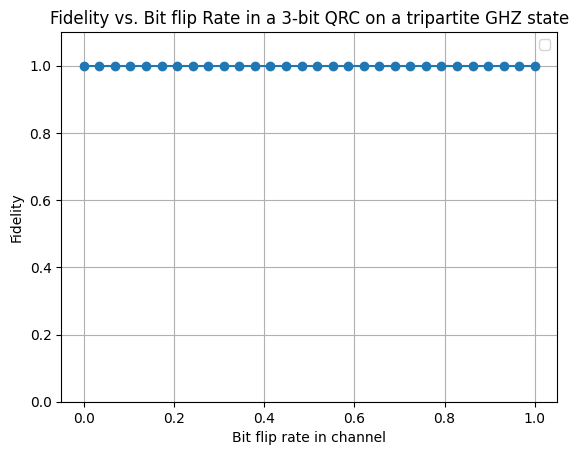

In [10]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities3, sigma=1), marker='o')
xlabel('Bit flip rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Bit flip Rate in a 3-bit QRC on a tripartite GHZ state')
ylim(0, 1.1)
grid()
legend()
savefig("Fidelity of GHZ state.pdf",dpi=400,bbox_inches="tight")

In [59]:
fidelities = [1.0, 0.9942222222222221, 0.9742222222222222, 0.9386666666666668, 0.9068888888888889, 0.8575555555555555, 0.8039999999999999, 0.7468888888888888, 0.699111111111111, 0.6522222222222221, 0.5964444444444444, 0.569111111111111, 0.522888888888889, 0.5135555555555555, 0.49444444444444446, 0.5086666666666666, 0.49977777777777777, 0.5355555555555556, 0.5553333333333333, 0.5944444444444444, 0.6542222222222223, 0.6962222222222223, 0.7402222222222222, 0.81, 0.857111111111111, 0.9102222222222222, 0.9417777777777778, 0.9751111111111112, 0.9944444444444444, 1.0]
fidelities2 = [1.0, 0.9946666666666666, 0.971111111111111, 0.9455555555555556, 0.9046666666666666, 0.8522222222222222, 0.8031111111111111, 0.7617777777777778, 0.6984444444444444, 0.6437777777777778, 0.6053333333333333, 0.5571111111111111, 0.54, 0.5157777777777778, 0.4926666666666667, 0.4975555555555556, 0.5166666666666667, 0.5455555555555556, 0.5644444444444445, 0.6062222222222222, 0.6675555555555556, 0.6924444444444444, 0.7575555555555556, 0.7948888888888889, 0.85, 0.9017777777777779, 0.9393333333333334, 0.971111111111111, 0.991111111111111, 1.0]
fidelities3 = [1.0, 0.9971111111111111, 0.9868888888888889, 0.9673333333333333, 0.9493333333333334, 0.9257777777777778, 0.8948888888888888, 0.866, 0.842, 0.8295555555555556, 0.7917777777777778, 0.7793333333333333, 0.764, 0.7506666666666666, 0.754, 0.7511111111111112, 0.7648888888888888, 0.7651111111111111, 0.7944444444444445, 0.8037777777777777, 0.8293333333333334, 0.8522222222222222, 0.8817777777777779, 0.892888888888889, 0.922, 0.9531111111111111, 0.9642222222222222, 0.9853333333333334, 0.9964444444444445, 1.0]
fidelities4 = [1.0, 0.9693333333333334, 0.9438333333333333, 0.9203333333333334, 0.9096666666666666, 0.8866666666666667, 0.8645, 0.8451666666666667, 0.8203333333333334, 0.8160000000000001, 0.7913333333333333, 0.7753333333333333, 0.77, 0.7591666666666667, 0.7618333333333334, 0.7446666666666667, 0.7571666666666667, 0.7656666666666666, 0.7728333333333333, 0.7825, 0.8186666666666667, 0.8221666666666667, 0.844, 0.8625, 0.8813333333333333, 0.9005, 0.9215, 0.9460000000000001, 0.9663333333333333, 1.0]
fidelities5 = [1.0, 0.9975555555555555, 0.987111111111111, 0.9731111111111111, 0.9542222222222222, 0.9237777777777777, 0.898888888888889, 0.8813333333333333, 0.8535555555555555, 0.8244444444444444, 0.800888888888889, 0.78, 0.7786666666666666, 0.7497777777777778, 0.7462222222222222, 0.7457777777777778, 0.7546666666666667, 0.7604444444444444, 0.7815555555555556, 0.8068888888888889, 0.8253333333333334, 0.8468888888888889, 0.8720000000000001, 0.8951111111111112, 0.9333333333333333, 0.9495555555555556, 0.9731111111111111, 0.9857777777777779, 0.9977777777777778, 1.0]

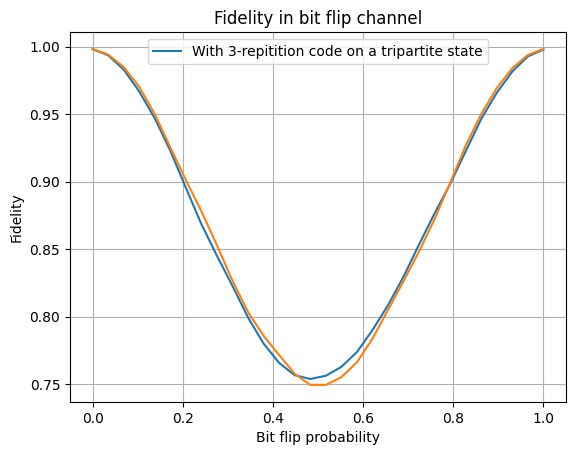

In [61]:
#plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), label="With 5-repetition code approx")
#plot(noise_prob, gaussian_filter1d(fidelities2, sigma=1), label="With 3-repitition code approx")
plot(noise_prob, gaussian_filter1d(fidelities3, sigma=1), label="With 3-repitition code on a tripartite state")
#plot(noise_prob, gaussian_filter1d(fidelities4, sigma=1), label="With 5-repitition code on a tripartite state")

title("Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()
savefig("t.png",dpi=400,bbox_inches="tight")

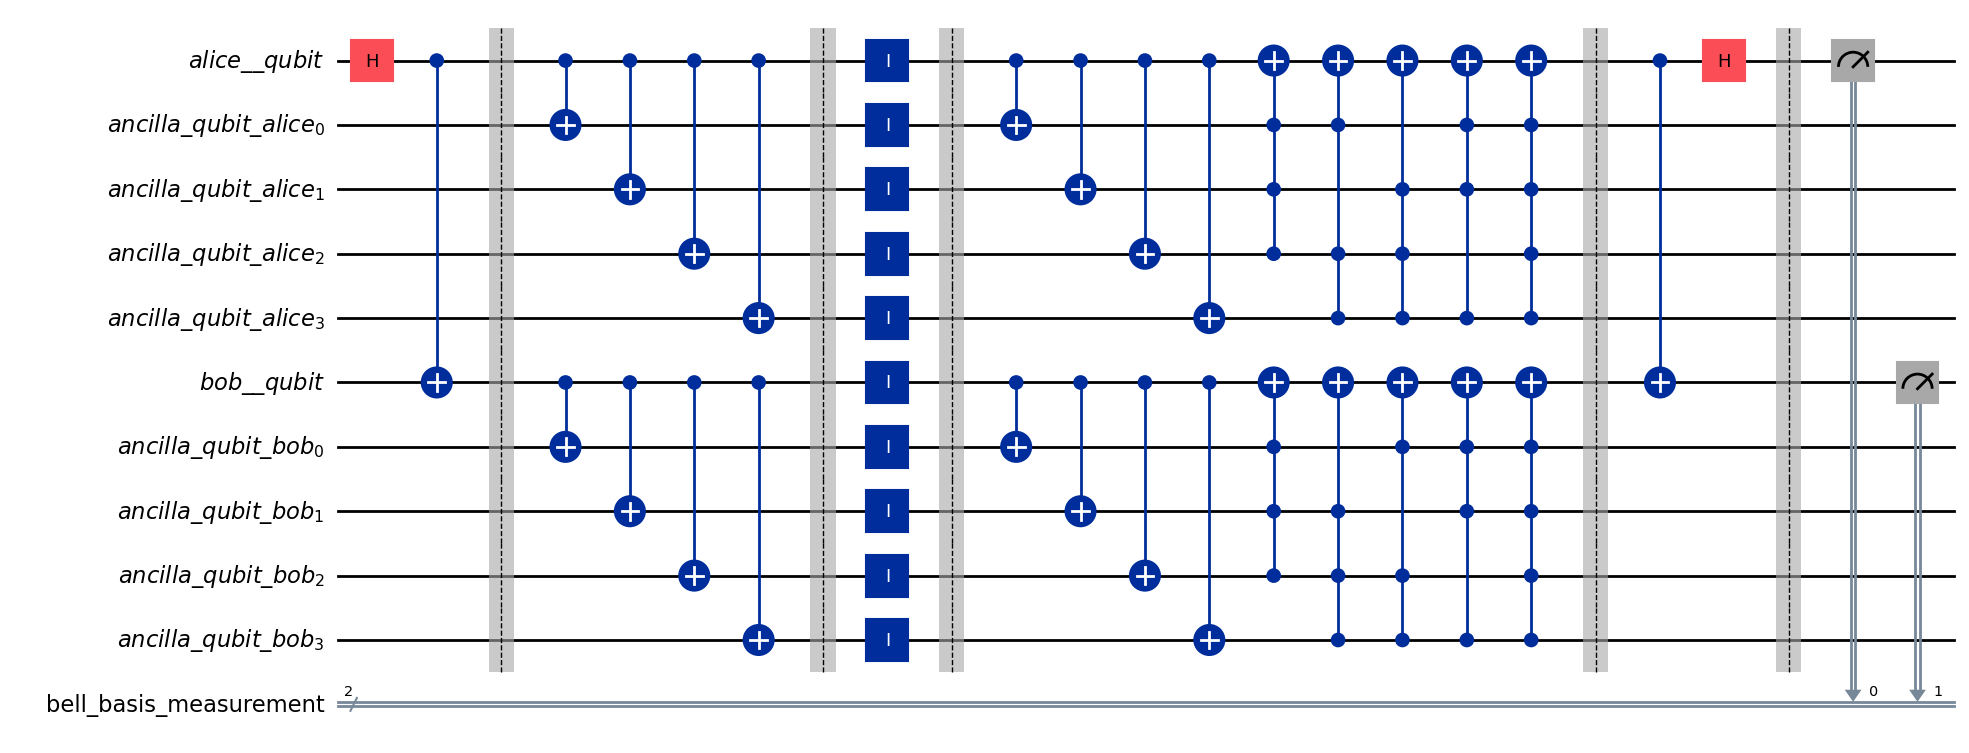

In [9]:
cr= ClassicalRegister(2,"bell_basis_measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(4, 'ancilla_qubit_alice')
lq2= QuantumRegister(4,'ancilla_qubit_bob')

repetition_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])

repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit, lq1)
repetition_code_qc.cx(bob_qubit, lq2)

repetition_code_qc.barrier()

repetition_code_qc.id(range(repetition_code_qc.num_qubits))
repetition_code_qc.barrier()

repetition_code_qc.cx(alice_qubit, lq1)
repetition_code_qc.cx(bob_qubit, lq2)
repetition_code_qc.mcx([1,2,3],0)
repetition_code_qc.mcx([1,3,4],0)
repetition_code_qc.mcx([2,3,4],0)
repetition_code_qc.mcx([1,2,4],0)
repetition_code_qc.mcx([1,2,3,4],0)
repetition_code_qc.mcx([6,7,8],5)
repetition_code_qc.mcx([7,8,9],5)
repetition_code_qc.mcx([6,8,9],5)
repetition_code_qc.mcx([6,7,9],5)
repetition_code_qc.mcx([6,7,8,9],5)
repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.barrier()
repetition_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
repetition_code_qc.draw(output='mpl')


In [22]:
# Range of noise levels for one-qubit gates
noise_prob = np.linspace(0,1,30)
# params = 4*noise_prob/3
fidelities = []

for rate in noise_prob:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    bit_flip_error = pauli_error([('X',rate), ('I', 1-rate)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip_error, 'id')
    
    simulator = simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(repetition_code_qc, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities.append(fidelity)

NameError: name 'repetition_code_qc' is not defined

In [21]:
print(fidelities)

NameError: name 'fidelities' is not defined

In [20]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Bit flip rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Bit flip Rate in a 5 bit repetition code on a bell state')
grid()
legend()

NameError: name 'fidelities' is not defined

In [ ]:
repetition_code_qc.draw(output='mpl').savefig("FiveCKT.png",dpi=400,bbox_inches="tight")

In [20]:
result=[]
for a1 in range(2):
    for a2 in range(2):
            for a3 in range(2):
                for a4 in range(2):
                    for a5 in range(2):
                        for b1 in range(2):
                            for b2 in range(2):
                                for b3 in range(2):
                                    for b4 in range(2):
                                        for b5 in range(2):
                                            a=["I","I","I","I","I","I","I","I","I","I"]

                                            cr= ClassicalRegister(2,"bell_basis_measurement")
                                            alice_qubit= QuantumRegister(1, 'alice__qubit')
                                            bob= QuantumRegister(1, 'bob__qubit')
                                            lq1= QuantumRegister(4, 'ancilla_qubit_alice')
                                            lq2= QuantumRegister(4,'ancilla_qubit_bob')

                                            repetition_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

                                            repetition_code_qc.h(alice_qubit[0])
                                            repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit, lq1)
                                            repetition_code_qc.cx(bob_qubit, lq2)

                                            repetition_code_qc.barrier()

                                            if a1:
                                                a[0]="X"
                                                repetition_code_qc.x(0)
                                            if a2:
                                                a[1]="X"
                                                repetition_code_qc.x(1)
                                            if a3:
                                                a[2]="X"
                                                repetition_code_qc.x(2)
                                            if a4:
                                                a[3]="X"
                                                repetition_code_qc.x(3)
                                            if a5:
                                                a[4]="X"
                                                repetition_code_qc.x(4)

                                            if b1:
                                                a[5]="X"
                                                repetition_code_qc.x(5)
                                            if b2:
                                                a[6]="X"
                                                repetition_code_qc.x(6)
                                            if b3:
                                                a[7]="X"
                                                repetition_code_qc.x(7)
                                            if b4:
                                                a[8]="X"
                                                repetition_code_qc.x(8)
                                            if b5:
                                                a[9]="X"
                                                repetition_code_qc.x(9)

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit, lq1)
                                            repetition_code_qc.cx(bob_qubit, lq2)

                                            repetition_code_qc.mcx([1,2,3],0)
                                            repetition_code_qc.mcx([1,3,4],0)
                                            repetition_code_qc.mcx([2,3,4],0)
                                            repetition_code_qc.mcx([1,2,4],0)
                                            repetition_code_qc.mcx([1,2,3,4],0)

                                            repetition_code_qc.mcx([6,7,8],5)
                                            repetition_code_qc.mcx([7,8,9],5)
                                            repetition_code_qc.mcx([6,8,9],5)
                                            repetition_code_qc.mcx([6,7,9],5)
                                            repetition_code_qc.mcx([6,7,8,9],5)

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
                                            repetition_code_qc.h(alice_qubit[0])

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
                                            sim = Aer.get_backend('qasm_simulator')
                                            new_circuit= transpile(repetition_code_qc, backend=sim)
                                            res = sim.run(new_circuit).result().get_counts()
                                            print(res)
                                            a.append(res)
                                            print(a)
                                            result.append(a)

{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'X', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'I', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'X', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'X', 'I', {'00': 1024}]
{'10': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'I', 'X', 'X', 'X', {'10': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'I', 'I', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'I', 'X', {'00': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'X', 'I', {'00': 1024}]
{'10': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'X', 'I', 'X', 'X', {'10': 1024}]
{'00': 1024}
['I', 'I', 'I', 'I', 'I', 'I', 'X', 'X', 'I', 'I', 

In [21]:
count=0
corrected = []
for c in result:
    if c[10]=={'00': 1024}:
        count=count+1
        corrected.append(c[:10])
print(count)

512


In [22]:
len(result)

1024

In [23]:
Summary= {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
for i in corrected:
    count=0
    for x in i:
        if x=="X":
            count=count+1
    Summary[count]+=1

print(Summary)

{0: 1, 1: 10, 2: 45, 3: 100, 4: 100, 5: 0, 6: 100, 7: 100, 8: 45, 9: 10, 10: 1}


In [25]:
p=linspace(0,1,21)
fid1= (1-p)**2+p**2

fid2=0
fid3=0

c1= {0: 1, 1: 6, 2: 9, 3: 0, 4: 9, 5: 6, 6: 1}
c2= {0: 1, 1: 10, 2: 45, 3: 100, 4: 100, 5: 0, 6: 100, 7: 100, 8: 45, 9: 10, 10: 1}

for i in range(7):
     fid2+= c1[i]*(p**i)*((1-p)**(6-i))
for i in range(11):
     fid3+= c2[i]*(p**i)*((1-p)**(10-i))

In [ ]:
# fid4=0
# c3={0:1, 1:3, 2:0, 3:0}
'''for i in range(4):
    fid4+= c3[i]*(p**i)*((1-p)**(3-i))
'''

'for i in range(4):\n    fid4+= c3[i]*(p**i)*((1-p)**(3-i))\n'

# For arbitrary entangled state

In [11]:
p=linspace(0,1,200)  #probability of bit flip

fid=0
fid1=0
fid2=0
fid3=0
fid4=0
fid5=0
fid6=0
fid7=0
fid8=0
fid9=0
fid10=0
fid11=0
fid12=0
fid13=0

c= {0: 1, 1: 3, 2:0, 3:0}
c0= {0: 1, 1: 5, 2: 10, 3: 0, 4: 0, 5: 0}
c1= {0:1, 1: 9, 2: 36, 3: 84, 4: 126, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
c2= {0: 1, 1: 6, 2: 9, 3: 0, 4: 0, 5: 0, 6: 0}
c3= {0: 1, 1: 9, 2: 27, 3: 27, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
c4= {0: 1, 1: 9, 2: 27, 3: 27, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
c5= {0: 1, 1: 9, 2: 36, 3: 84, 4: 99, 5: 27, 6: 0, 7: 0, 8: 0, 9: 0}
c6= {0: 1, 1: 15, 2: 105, 3: 425, 4: 1050, 5: 1500, 6: 1000, 7: 0, 8: 0, 9: 0, 10: 0, 11:0, 12:0, 13:0, 14:0, 15:0}
c7= {0: 1, 1: 15, 2: 105, 3: 455, 4: 1365, 5: 3003, 6: 4705, 7: 4635, 8: 1800, 9: 300, 10: 0, 11:0, 12:0, 13:0, 14:0, 15:0}
c8= {0: 1, 1: 15, 2: 90, 3: 270, 4: 405, 5: 243, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11:0, 12:0, 13:0, 14:0, 15:0}
c9= {0: 1, 1: 15, 2: 105, 3: 455, 4: 1365, 5: 3003, 6: 4735, 7: 4545, 8: 1890, 9: 270, 10: 0, 11:0, 12:0, 13:0, 14:0, 15:0}
c10= {0: 1, 1: 25, 2: 300, 3: 2250, 4: 11650, 5: 43630, 6: 85250, 7: 225000, 8: 300000, 9: 250000, 10: 100000, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
c11= {0: 1, 1: 25, 2: 300, 3: 2300, 4: 12650, 5: 53130, 6: 177100, 7: 480700, 8: 1081575, 9: 2032975, 10: 3153760, 11: 3846900, 12: 3366050, 13: 1835000, 14: 610500, 15: 115000, 16: 10000, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
c12= {0: 1, 1: 2, 2: 1, 3:0}

for i in range(4):
     fid+= c[i]*(p**i)*((1-p)**(3-i))
for i in range(6):
     fid1+= c0[i]*(p**i)*((1-p)**(5-i))
for i in range(10):
     fid2+= c1[i]*(p**i)*((1-p)**(9-i))       
for i in range(7):
     fid3+= c2[i]*(p**i)*((1-p)**(6-i))
for i in range(10):
     fid4+= c3[i]*(p**i)*((1-p)**(9-i))
for i in range(10):
     fid5+= c4[i]*(p**i)*((1-p)**(9-i))
for i in range(10):
     fid6+= c5[i]*(p**i)*((1-p)**(9-i))
for i in range(16):
     fid7+= c6[i]*(p**i)*((1-p)**(15-i))
for i in range(16):
     fid8+= c7[i]*(p**i)*((1-p)**(15-i))
for i in range(16):
     fid9+= c8[i]*(p**i)*((1-p)**(15-i))
for i in range(16):
     fid10+= c9[i]*(p**i)*((1-p)**(15-i))
for i in range(16):
     fid11+= c10[i]*(p**i)*((1-p)**(25-i))
for i in range(16):
     fid12+= c11[i]*(p**i)*((1-p)**(25-i))
for i in range(4):
     fid13+= c12[i]*(p**i)*((1-p)**(3-i))

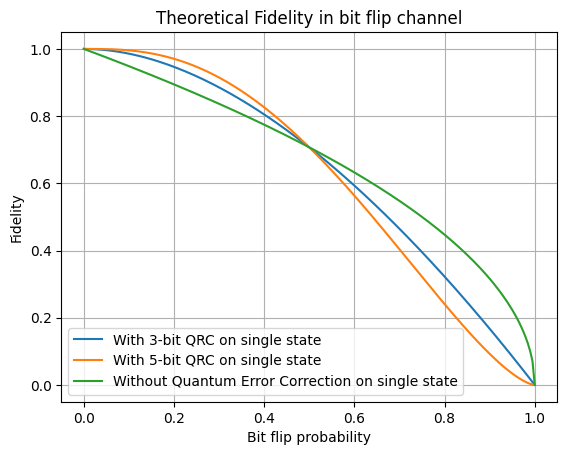

In [13]:
plot(p,sqrt(fid), label="With 3-bit QRC on single state")
plot(p,sqrt(fid1), label="With 5-bit QRC on single state")
#plot(p,sqrt(fid2), label="with 9-bit QRC on a single state")
#plot(p,sqrt(fid3), label="With 3-bit QRC on bell state")
#plot(p,sqrt(fid4), label="With 5-bit QRC on bell state")
#plot(p,sqrt(fid5), label="With 3-bit QRC on tripartite GHZ state")
#plot(p,sqrt(fid6), label="With extended 3-bit QRC on tripartite GHZ state")
#plot(p,sqrt(fid7), label="With 5-bit QRC on tripartite GHZ state")
#plot(p,sqrt(fid8), label="With extended 5-bit QRC on tripartite GHZ state")
#plot(p,sqrt(fid9), label="With 3-bit QRC on pentapartite GHZ state")
#plot(p,sqrt(fid10), label="With extended 3-bit QRC on pentapartite GHZ state")
#plot(p,sqrt(fid11), label="With 5-bit QRC on pentapartite GHZ state")
#plot(p,sqrt(fid12), label="With extended 5-bit QRC on pentapartite GHZ state")
plot(p,sqrt(1-p), label="Without Quantum Error Correction on single state")

title("Theoretical Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
#xlim([0,0.5])
#ylim([0.7,1])
grid()
legend()
#legend(loc='lower left',frameon=False,shadow=True)
savefig("Efficacy of Quantum Repetition Code.pdf",dpi=400,bbox_inches="tight")

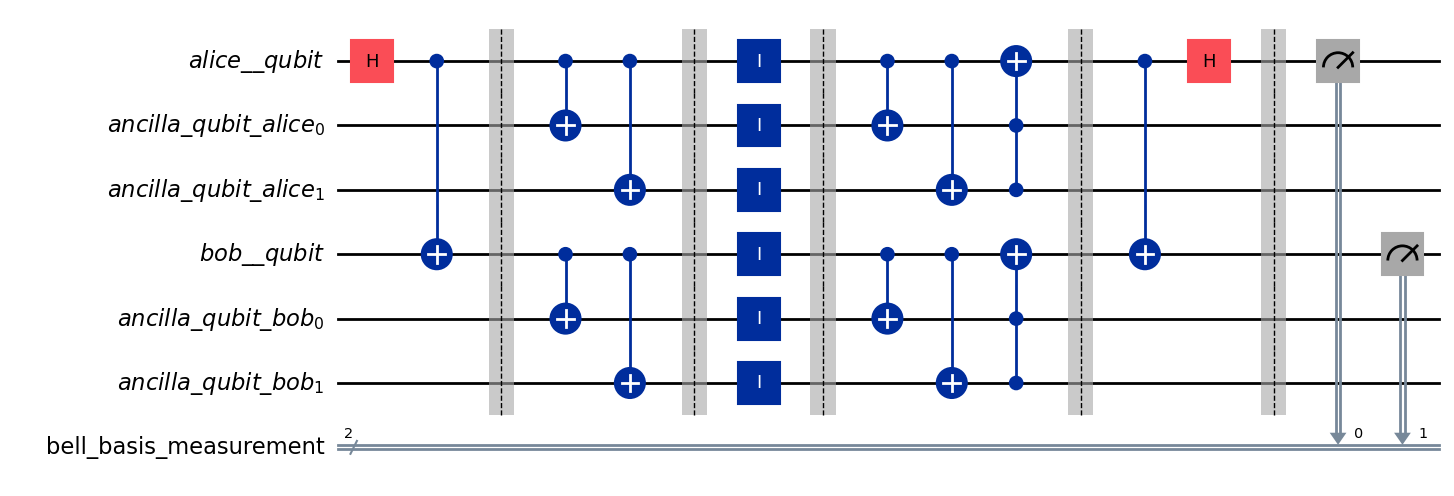

In [17]:
cr= ClassicalRegister(2,"bell_basis_measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(2, 'ancilla_qubit_alice')
lq2= QuantumRegister(2,'ancilla_qubit_bob')

repetition_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit[0],lq1[0])
repetition_code_qc.cx(alice_qubit[0],lq1[1])
repetition_code_qc.cx(bob_qubit[0],lq2[0])
repetition_code_qc.cx(bob_qubit[0],lq2[1])

#repetition_code_qc.h(range(6))
repetition_code_qc.barrier()

repetition_code_qc.id(range(repetition_code_qc.num_qubits))

repetition_code_qc.barrier()
#repetition_code_qc.h(range(6))
repetition_code_qc.cx(alice_qubit[0], lq1[0])
repetition_code_qc.cx(alice_qubit[0], lq1[1])
repetition_code_qc.ccx(lq1[0], lq1[1], alice_qubit[0])

repetition_code_qc.cx(bob_qubit[0], lq2[0])
repetition_code_qc.cx(bob_qubit[0], lq2[1])
repetition_code_qc.ccx(lq2[0], lq2[1], bob_qubit[0])

repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.barrier()
repetition_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
repetition_code_qc.draw(output='mpl')

In [35]:
# Range of noise levels for one-qubit gates
noise_prob = np.linspace(0,1,30)
# params = 4*noise_prob/3
fidelities2 = []

for rate in noise_prob:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    bit_flip_error = pauli_error([('X',rate), ('I', 1-rate)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip_error, 'id')
    
    simulator = simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(repetition_code_qc, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities2.append(fidelity)

{'00': 300.0}
{'10': 1.6, '00': 298.4}
{'10': 8.666666666666666, '00': 291.3333333333333}
{'10': 16.333333333333332, '00': 283.6666666666667}
{'10': 28.6, '00': 271.4}
{'10': 44.333333333333336, '00': 255.66666666666666}
{'10': 59.06666666666667, '00': 240.93333333333334}
{'10': 71.46666666666667, '00': 228.53333333333333}
{'10': 90.46666666666667, '00': 209.53333333333333}
{'10': 106.86666666666666, '00': 193.13333333333333}
{'10': 118.4, '00': 181.6}
{'10': 132.86666666666667, '00': 167.13333333333333}
{'10': 138.0, '00': 162.0}
{'10': 145.26666666666668, '00': 154.73333333333332}
{'10': 152.2, '00': 147.8}
{'10': 150.73333333333332, '00': 149.26666666666668}
{'10': 145.0, '00': 155.0}
{'10': 136.33333333333334, '00': 163.66666666666666}
{'10': 130.66666666666666, '00': 169.33333333333334}
{'10': 118.13333333333334, '00': 181.86666666666667}
{'10': 99.73333333333333, '00': 200.26666666666668}
{'10': 92.26666666666667, '00': 207.73333333333332}
{'10': 72.73333333333333, '00': 227.2666

In [36]:
print(fidelities2)

[1.0, 0.9946666666666666, 0.971111111111111, 0.9455555555555556, 0.9046666666666666, 0.8522222222222222, 0.8031111111111111, 0.7617777777777778, 0.6984444444444444, 0.6437777777777778, 0.6053333333333333, 0.5571111111111111, 0.54, 0.5157777777777778, 0.4926666666666667, 0.4975555555555556, 0.5166666666666667, 0.5455555555555556, 0.5644444444444445, 0.6062222222222222, 0.6675555555555556, 0.6924444444444444, 0.7575555555555556, 0.7948888888888889, 0.85, 0.9017777777777779, 0.9393333333333334, 0.971111111111111, 0.991111111111111, 1.0]


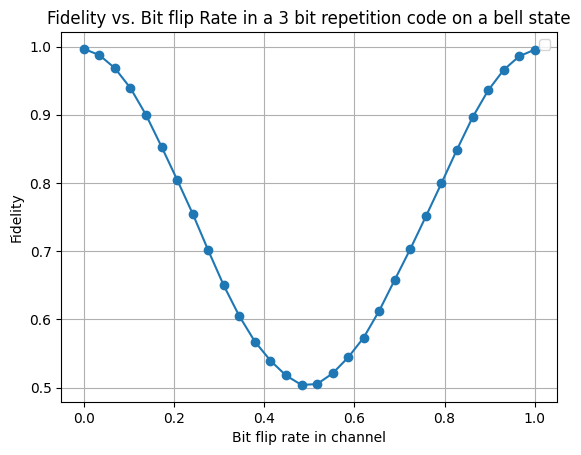

In [44]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities2, sigma=1), marker='o')
xlabel('Bit flip rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Bit flip Rate in a 3 bit repetition code on a bell state')
grid()
legend()

In [ ]:
repetition_code_qc.draw(output='mpl').savefig("Phaseflip.png",dpi=400,bbox_inches="tight")

# Modification

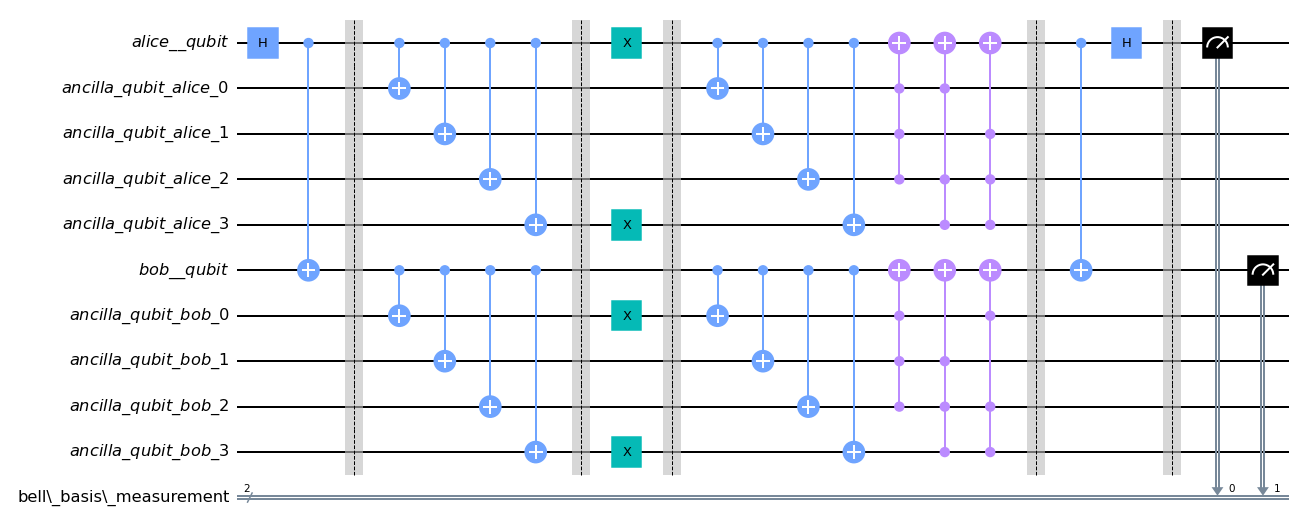

In [ ]:
cr= ClassicalRegister(2,"bell_basis_measurement")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
lq1= QuantumRegister(4, 'ancilla_qubit_alice')
lq2= QuantumRegister(4,'ancilla_qubit_bob')

repetition_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])

repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit, lq1)
repetition_code_qc.cx(bob_qubit, lq2)

repetition_code_qc.barrier()

repetition_code_qc.x([0,4,6,9])
repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit, lq1)
repetition_code_qc.cx(bob_qubit, lq2)
repetition_code_qc.mct([1,2,3],0)
repetition_code_qc.mct([1,3,4],0)
repetition_code_qc.mct([2,3,4],0)
#repetition_code_qc.mct([1,2,4],0)
#repetition_code_qc.mct([1,2,3,4],0)
repetition_code_qc.mct([6,7,8],5)
repetition_code_qc.mct([7,8,9],5)
repetition_code_qc.mct([6,8,9],5)
#repetition_code_qc.mct([6,7,9],5)
#repetition_code_qc.mct([6,7,8,9],5)
repetition_code_qc.barrier()
repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
repetition_code_qc.h(alice_qubit[0])
repetition_code_qc.barrier()
repetition_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
repetition_code_qc.draw(output='mpl')


In [ ]:
result=[]
for a1 in range(2):
    for a2 in range(2):
            for a3 in range(2):
                for a4 in range(2):
                    for a5 in range(2):
                        for b1 in range(2):
                            for b2 in range(2):
                                for b3 in range(2):
                                    for b4 in range(2):
                                        for b5 in range(2):
                                            a=["I","I","I","I","I","I","I","I","I","I"]

                                            cr= ClassicalRegister(2,"bell_basis_measurement")
                                            alice_qubit= QuantumRegister(1, 'alice__qubit')
                                            bob_qubit= QuantumRegister(1, 'bob__qubit')
                                            lq1= QuantumRegister(4, 'ancilla_qubit_alice')
                                            lq2= QuantumRegister(4,'ancilla_qubit_bob')

                                            repetition_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)

                                            repetition_code_qc.h(alice_qubit[0])
                                            repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit, lq1)
                                            repetition_code_qc.cx(bob_qubit, lq2)

                                            repetition_code_qc.barrier()

                                            if a1:
                                                a[0]="X"
                                                repetition_code_qc.x(0)
                                            if a2:
                                                a[1]="X"
                                                repetition_code_qc.x(1)
                                            if a3:
                                                a[2]="X"
                                                repetition_code_qc.x(2)
                                            if a4:
                                                a[3]="X"
                                                repetition_code_qc.x(3)
                                            if a5:
                                                a[4]="X"
                                                repetition_code_qc.x(4)

                                            if b1:
                                                a[5]="X"
                                                repetition_code_qc.x(5)
                                            if b2:
                                                a[6]="X"
                                                repetition_code_qc.x(6)
                                            if b3:
                                                a[7]="X"
                                                repetition_code_qc.x(7)
                                            if b4:
                                                a[8]="X"
                                                repetition_code_qc.x(8)
                                            if b5:
                                                a[9]="X"
                                                repetition_code_qc.x(9)

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit, lq1)
                                            repetition_code_qc.cx(bob_qubit, lq2)

                                            repetition_code_qc.mct([1,2,3],0)
                                            repetition_code_qc.mct([1,3,4],0)
                                            repetition_code_qc.mct([2,3,4],0)
                                            #repetition_code_qc.mct([1,2,4],0)
                                            #repetition_code_qc.mct([1,2,3,4],0)

                                            repetition_code_qc.mct([6,7,8],5)
                                            repetition_code_qc.mct([7,8,9],5)
                                            repetition_code_qc.mct([6,8,9],5)
                                            #repetition_code_qc.mct([6,7,9],5)
                                            #repetition_code_qc.mct([6,7,8,9],5)

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.cx(alice_qubit[0],bob_qubit[0])
                                            repetition_code_qc.h(alice_qubit[0])

                                            repetition_code_qc.barrier()
                                            repetition_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
                                            sim = Aer.get_backend('qasm_simulator')
                                            res= execute(repetition_code_qc, backend=sim, shots=64).result().get_counts()
                                            a.append(res)
                                            result.append(a)

In [ ]:
count=0
corrected = []
for c in result:
    if c[10]=={'00': 64}:
        count=count+1
        corrected.append(c[:10])
Summary= {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
for i in corrected:
    count=0
    for x in i:
        if x=="X":
            count=count+1
    Summary[count]+=1
c3= Summary
print(c3)

{0: 1, 1: 10, 2: 43, 3: 92, 4: 92, 5: 36, 6: 92, 7: 92, 8: 43, 9: 10, 10: 1}


In [ ]:
p=linspace(0,1,21)
fid4=0
for i in range(11):
     fid4+= c3[i]*(p**i)*((1-p)**(10-i))

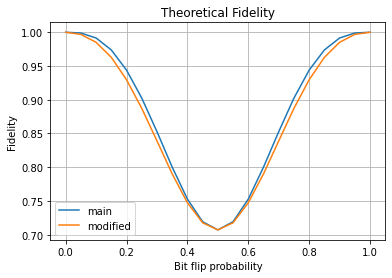

In [ ]:
plot(p,sqrt(fid3), label="main")
plot(p,sqrt(fid4), label="modified")
title("Theoretical Fidelity")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()
savefig("t.png",dpi=400,bbox_inches="tight")